In this notebook I'll apply several clustering algorithm and see which algorithm perform how.

In [1]:
# Importing required libraries for data manipulation & visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# setting style of seaborn plot
sns.set_theme(style='whitegrid')

# for ignoring any unwanted warning
import warnings
warnings.filterwarnings('ignore')


# Importing Machine Learning Algorithms
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

# for finding optimum cluster
import scipy.cluster.hierarchy as sch

In [2]:
final_df = pd.read_csv('final_df.csv')
final_df.head() # view first five rows of the dataset

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,2085,8,8,0,6,2,9
1,742,7,5,3,2,1,4
2,750,4,1,0,3,9,8
3,1224,6,0,0,4,2,3
4,2210,9,9,3,7,2,3


In [3]:
# Now let's take the values from only from the dataset
x = final_df.iloc[:,:].values

Now let's start ML for this section. First I'll implement
### Kmeans Clustering.

In [4]:
# First let's find the optimum number of cluster using the elbow method

wcss = [] # defining an empty list
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300,
                   n_init=10, random_state= 41)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

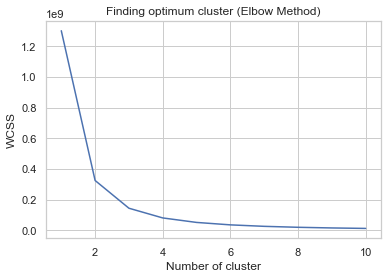

In [5]:
# let's plot the lst to visualize what is the optimum cluster

plt.plot(range(1,11), wcss)
plt.title('Finding optimum cluster (Elbow Method)')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

Here we can see that from point '2' the slope didn't change so much. So we'll use 2 cluster for our main model. We can also create 3 clusters but we will go with 2.

In [6]:
# Fianl model with KMeans Cluster
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state= 41)
f_kmeans = kmeans.fit_predict(x) # predicting

In [7]:
df_cluster = final_df.copy()

In [8]:
df_cluster['cluster'] = f_kmeans

In [9]:
df_cluster.head()

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information,cluster
0,2085,8,8,0,6,2,9,1
1,742,7,5,3,2,1,4,0
2,750,4,1,0,3,9,8,0
3,1224,6,0,0,4,2,3,0
4,2210,9,9,3,7,2,3,1


In [10]:
cluster_zero = df_cluster[df_cluster['cluster'] == 0]
cluster_one = df_cluster[df_cluster['cluster'] == 1]
print(cluster_one['cluster'].value_counts())
print(cluster_zero['cluster'].value_counts())

1    1249
Name: cluster, dtype: int64
0    1251
Name: cluster, dtype: int64


### Hierarchical Clustering

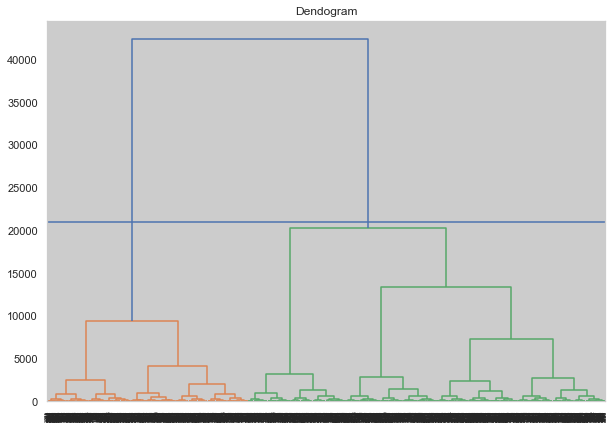

In [11]:
# Plotting a dendogram to find optimum number of cluster
plt.figure(figsize = (10,7))
plt.title('Dendogram')
dendo = sch.dendrogram(sch.linkage(x, method='ward'))
plt.axhline(y = 21000)
plt.show()

Here we can see that the optimum number of clusters are only 2. Now, let's apply Hierarchical clustering

In [12]:
# applying Hierarchical clustering
hc = AgglomerativeClustering(n_clusters= 2, affinity='euclidean', linkage= 'ward')
c_hc = hc.fit_predict(x) # fitting & predict the clusters

In [13]:
df_hc = final_df.copy()
df_hc['cluster'] = c_hc # adding new cluster column got from HC algorithm
df_hc.head() # view the dataset.

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information,cluster
0,2085,8,8,0,6,2,9,1
1,742,7,5,3,2,1,4,0
2,750,4,1,0,3,9,8,0
3,1224,6,0,0,4,2,3,0
4,2210,9,9,3,7,2,3,1


In [14]:
hc_cluster_zero = df_hc[df_hc['cluster'] == 0]
hc_cluster_one = df_hc[df_hc['cluster'] == 1]
print(hc_cluster_one['cluster'].value_counts())
print(hc_cluster_zero['cluster'].value_counts())

1    898
Name: cluster, dtype: int64
0    1602
Name: cluster, dtype: int64


Here we can see those two algorithm has perform differently though their cluster number is same but they contain different number of customer in each segment.

Now let's perform another algorithm to see how it performs.

### DBSCAN

In Previous, while taking the optimum number of cluster from elbow method we've taken 2 cluster and there the WCSS value for 2 is about 0.39 which we will use as the epsilon value of the DBSCAN algorithm

In [15]:
dbscan_opt=DBSCAN(eps=0.39, min_samples=6) # creating instance
dbsc = dbscan_opt.fit_predict(x) # fitting and predicting

In [16]:
df_db = final_df.copy()
df_db['cluster'] = dbsc # adding new cluster column got from HC algorithm
df_db.head() # view the dataset.

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information,cluster
0,2085,8,8,0,6,2,9,-1
1,742,7,5,3,2,1,4,-1
2,750,4,1,0,3,9,8,-1
3,1224,6,0,0,4,2,3,-1
4,2210,9,9,3,7,2,3,-1


In [17]:
df_db['cluster'].value_counts()

-1    2500
Name: cluster, dtype: int64

Here we can see that the DBSCAN algorithm creates only one cluster taking all the customer within one cluster.